In [1]:
import tensorflow as tf

C:\Users\keshu\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets("/tmp/data",one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data\train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data\t10k-labels-idx1-ubyte.gz


In [19]:
sample = mnist.train.images[253].reshape(28,28)

In [20]:
import matplotlib.pyplot as plt

In [21]:
%matplotlib inline

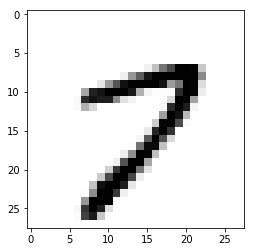

In [22]:
plt.imshow(sample,cmap='Greys')

In [23]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [24]:
n_class = 10
n_samples = mnist.train.num_examples

In [25]:
mnist.train.num_examples

55000

In [26]:
n_input = 784

In [31]:
n_hidden_1 = 256
n_hidden_2 = 256
n_classes = 10

In [40]:
def multilayer_perceptron(x,weights,biases):
    '''
    x:Placeholder for data input
    weights:dict of weights
    biases:sict of bias values
    '''
    
    # First Hiden Layer with RELU Activation
    layer_1 = tf.add(tf.matmul(x,weights['h1']),biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    
    #Second layer
    layer_2 = tf.add(tf.matmul(layer_1,weights['h2']),biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    #last layer
    out_layer = tf.matmul(layer_2,weights['out'])+ biases['out']
    
    return out_layer

In [41]:
weights = {
   'h1':tf.Variable(tf.random_normal([n_input,n_hidden_1])),
   'h2':tf.Variable(tf.random_normal([n_hidden_1,n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_hidden_2,n_classes]))
}

In [42]:
weights

{'h1': <tf.Variable 'Variable_8:0' shape=(784, 256) dtype=float32_ref>,
 'h2': <tf.Variable 'Variable_9:0' shape=(256, 256) dtype=float32_ref>,
 'out': <tf.Variable 'Variable_10:0' shape=(256, 10) dtype=float32_ref>}

In [43]:
biases = {
   'b1':tf.Variable(tf.random_normal([n_hidden_1])),
   'b2':tf.Variable(tf.random_normal([n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_classes]))
}

In [44]:
x = tf.placeholder('float',[None,n_input])

In [45]:
y = tf.placeholder('float',[None,n_classes])

In [46]:
pred = multilayer_perceptron(x,weights,biases)

In [51]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = pred,labels= y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [59]:
t = mnist.train.next_batch(1)

In [60]:
len(t[1])

1

In [61]:
Xsamp,ysamp = t

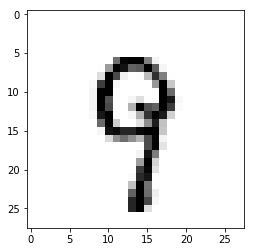

In [62]:
plt.imshow(Xsamp.reshape(28,28),cmap='Greys')

In [63]:
ysamp

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [64]:
##Runing session

In [65]:
sess = tf.InteractiveSession()

In [67]:
init = tf.global_variables_initializer()

In [68]:
sess.run(init)

In [71]:
# 15 loops
for epoch in range(training_epochs):
    avg_cost = 0.0
    
    total_batch = int(n_samples/batch_size)
    
    for i in range(total_batch):
        batch_x,batch_y = mnist.train.next_batch(batch_size)
        
        _,c=sess.run([optimizer,cost],feed_dict={x:batch_x,y:batch_y})
        
        avg_cost +=c/total_batch
        
    print("Epoch: {} cost {:.4f}".format(epoch+1,avg_cost))
    
print("Model has completed {} Epochs of trainig".format(training_epochs))

Epoch: 1 cost 207.1265
Epoch: 2 cost 43.2590
Epoch: 3 cost 27.2909
Epoch: 4 cost 19.1056
Epoch: 5 cost 14.0534
Epoch: 6 cost 10.3452
Epoch: 7 cost 7.8538
Epoch: 8 cost 5.8875
Epoch: 9 cost 4.5351
Epoch: 10 cost 3.4146
Epoch: 11 cost 2.5658
Epoch: 12 cost 1.9281
Epoch: 13 cost 1.5129
Epoch: 14 cost 1.1725
Epoch: 15 cost 1.0753
Model has completed 15 Epochs of trainig


In [73]:
correct_predections = tf.equal(tf.argmax(pred,1),tf.argmax(y,1))

In [75]:
print(correct_predections[0])

Tensor("strided_slice:0", shape=(), dtype=bool)


In [76]:
correct_predections = tf.cast(correct_predections,'float')

In [77]:
print(correct_predections[0])

Tensor("strided_slice_1:0", shape=(), dtype=float32)


In [78]:
accuracy=tf.reduce_mean(correct_predections)

In [79]:
type(accuracy)

tensorflow.python.framework.ops.Tensor

In [80]:
mnist.test.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [81]:
accuracy.eval({x:mnist.test.images,y:mnist.test.labels})

0.9454